In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### About dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [6]:
raw_data = pd.read_csv("teleCust1000t.csv")
raw_data

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [13]:
# check for null values
raw_data.isna().count()

region     1000
tenure     1000
age        1000
marital    1000
address    1000
income     1000
ed         1000
employ     1000
retire     1000
gender     1000
reside     1000
custcat    1000
dtype: int64

### Data visualization

In [16]:
for i in range(len(raw_data.columns)):
    print(raw_data[raw_data.columns[i]].value_counts())
    print()

3    344
2    334
1    322
Name: region, dtype: int64

72    31
3     20
24    20
48    20
13    19
      ..
47     7
2      7
36     7
21     6
63     6
Name: tenure, Length: 72, dtype: int64

33    39
39    35
35    34
34    32
31    32
37    31
40    28
42    28
30    26
52    25
36    25
45    24
46    24
27    24
43    24
48    24
54    24
41    24
50    23
25    23
51    23
28    22
38    21
32    21
26    21
47    21
55    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
60    11
61    11
20    10
64    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
77     1
71     1
72     1
73     1
74     1
18     1
Name: age, dtype: int64

0    505
1    495
Name: marital, dtype: int64

1     68
2     66
3     61
4     61
0     56
7     53
5     50
9     41
8     39
10    38
6     36
12    36
13    33
19    29
15    24
14    24
11    23
17    22
18    20
20    20
21    20
27   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3C7CDD608>]],
      dtype=object)

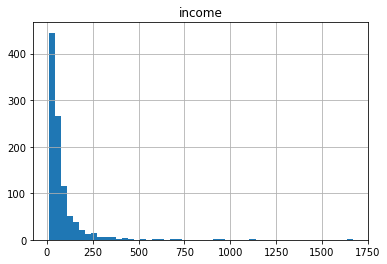

In [17]:
raw_data.hist(column='income', bins=50)

* To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [40]:
X = raw_data.iloc[:,:-1].values
y = raw_data.iloc[:,-1].values
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

### Normalize Data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [52]:
standard = StandardScaler()
X = standard.fit_transform(X)

### Split the array

In [68]:
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [69]:
print("Training set: ", X_train.shape, y_train.shape)
print()
print("Testing set: ", X_test.shape, y_test.shape)


Training set:  (800, 11) (800,)

Testing set:  (200, 11) (200,)


* Import kneighbors classifier and metrics library

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Training the model

In [71]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Prediction from model

In [72]:
y_hat = neigh.predict(X_test)
y_hat

array([4, 2, 3, 2, 3, 3, 4, 3, 1, 4, 2, 3, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1,
       1, 3, 3, 3, 2, 4, 4, 4, 1, 1, 3, 1, 4, 2, 1, 1, 1, 4, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       4, 1, 2, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 1, 1, 2, 2, 3, 3, 1, 4,
       2, 2, 4, 3, 2, 3, 3, 2, 2, 1, 4, 1, 2, 3, 1, 2, 4, 1, 1, 3, 1, 2,
       2, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 1, 2, 1, 4,
       1, 1, 4, 2, 3, 2, 1, 1, 4, 1, 1, 4, 1, 4, 4, 3, 4, 3, 1, 4, 1, 3,
       3, 1, 2, 3, 3, 1, 4, 1, 2, 3, 1, 1, 2, 3, 1, 4, 1, 3, 4, 4, 3, 4,
       4, 1, 1, 1, 2, 3, 4, 2, 1, 4, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 4,
       4, 3], dtype=int64)

### Accuracy evaluation

In multilabel classification, __accuracy classification__ score function computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how match the actual labels and predicted labels are in the test set.


In [73]:
print("Training set accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print()
print("Testing set accuracy: ", accuracy_score(y_test, neigh.predict(X_test)))

Training set accuracy:  0.54375

Testing set accuracy:  0.325


In [74]:
k = np.arange(1,10)
for i in range(len(k)):
    neigh = KNeighborsClassifier(n_neighbors=k[i]).fit(X_train, y_train)
    print("Training set accuracy for k = {}: ".format(k[i]), accuracy_score(y_train, neigh.predict(X_train)))
    print("Testing set accuracy for k = {}: ".format(k[i]), accuracy_score(y_test, neigh.predict(X_test)))
    print()

Training set accuracy for k = 1:  1.0
Testing set accuracy for k = 1:  0.29

Training set accuracy for k = 2:  0.63125
Testing set accuracy for k = 2:  0.34

Training set accuracy for k = 3:  0.575
Testing set accuracy for k = 3:  0.365

Training set accuracy for k = 4:  0.54375
Testing set accuracy for k = 4:  0.325

Training set accuracy for k = 5:  0.54375
Testing set accuracy for k = 5:  0.33

Training set accuracy for k = 6:  0.5075
Testing set accuracy for k = 6:  0.33

Training set accuracy for k = 7:  0.505
Testing set accuracy for k = 7:  0.33

Training set accuracy for k = 8:  0.51375
Testing set accuracy for k = 8:  0.335

Training set accuracy for k = 9:  0.50875
Testing set accuracy for k = 9:  0.33



In [76]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.29 , 0.34 , 0.365, 0.325, 0.33 , 0.33 , 0.33 , 0.335, 0.33 ])

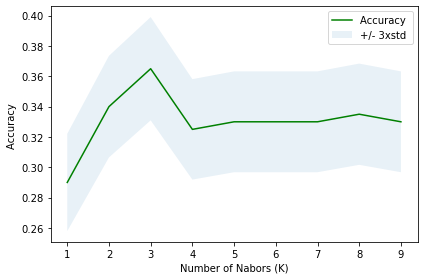

In [77]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [78]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.365 with k= 3
